# Challenge - Population

Let's work on a small project with a population dataset in order to use our new statistical powers!

Import numpy, matplotlib and pandas, and then open the dataset `population.csv`.

In [188]:
# TODO: import numpy, matplotlib and pandas
! pip install pycountry
! pip install country_converter
import pycountry
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import country_converter as coco
import seaborn as sns
%pip install prophet
from prophet import Prophet
import io




Note: you may need to restart the kernel to use updated packages.


In [125]:
# TODO: Import the dataset into the variable population
population =pd.read_csv("../input/population.csv")

Inspect the data by yourself, see what there is inside, if there are missing values, what are the rows, columns...

Feel free to make some data visualization and reuse what you learnt about data exploration!

In [126]:
display(population.head(10))
print(f"There is {population[population.isna().iloc[:, 0]].shape[0]} missing values in the dataset")
population.dropna(inplace=True)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,Andorra,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,21888.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,Afghanistan,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,10599790.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,Angola,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,6066094.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
4,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0
5,Arab World,92540534.0,95077992.0,97711191.0,100439395.0,103263656.0,106184090.0,109210743.0,112342573.0,115557094.0,...,320906736.0,328766559.0,336886468.0,345054176.0,353112237.0,361031820.0,368802611.0,376504253.0,384222592.0,392022276.0
6,United Arab Emirates,92612.0,100985.0,112240.0,125216.0,138220.0,150318.0,161077.0,171781.0,185312.0,...,5171255.0,6010100.0,6900142.0,7705423.0,8329453.0,8734722.0,8952542.0,9039978.0,9086139.0,9156963.0
7,Argentina,20619075.0,20953079.0,21287682.0,21621845.0,21953926.0,22283389.0,22608747.0,22932201.0,23261273.0,...,39558750.0,39969903.0,40381860.0,40798641.0,41222875.0,41655616.0,42095224.0,42538304.0,42980026.0,43416755.0
8,Armenia,1867396.0,1934239.0,2002170.0,2070427.0,2138133.0,2204650.0,2269475.0,2332624.0,2394635.0,...,3002161.0,2988117.0,2975029.0,2966108.0,2963496.0,2967984.0,2978339.0,2992192.0,3006154.0,3017712.0
9,American Samoa,20012.0,20478.0,21118.0,21883.0,22701.0,23518.0,24320.0,25116.0,25886.0,...,58648.0,57904.0,57031.0,56226.0,55636.0,55316.0,55227.0,55302.0,55434.0,55538.0


There is 0 missing values in the dataset


In [127]:
def country_or_not(name):
    """
    Vérifie si un nom correspond à un pays en utilisant pycountry.
    Retourne True si un pays est trouvé, sinon False.
    """
    try:
        # search_fuzzy est flexible et trouve les pays même avec des noms approximatifs
        pycountry.countries.search_fuzzy(name)
        return True
    except LookupError:
        return False

In [128]:
masque_pays = population['Country Name'].apply(country_or_not)
population = population[masque_pays]



In [176]:
converter = coco.CountryConverter()
population['Continent'] = converter.convert(names=population['Country Name'], to='continent')
population.head(10)


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Continent
0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,...,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0,America
1,Andorra,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,21888.0,...,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0,Europe
2,Afghanistan,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,10599790.0,...,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0,Asia
3,Angola,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,6066094.0,...,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0,Africa
4,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0,Europe
6,United Arab Emirates,92612.0,100985.0,112240.0,125216.0,138220.0,150318.0,161077.0,171781.0,185312.0,...,6010100.0,6900142.0,7705423.0,8329453.0,8734722.0,8952542.0,9039978.0,9086139.0,9156963.0,Asia
7,Argentina,20619075.0,20953079.0,21287682.0,21621845.0,21953926.0,22283389.0,22608747.0,22932201.0,23261273.0,...,39969903.0,40381860.0,40798641.0,41222875.0,41655616.0,42095224.0,42538304.0,42980026.0,43416755.0,America
8,Armenia,1867396.0,1934239.0,2002170.0,2070427.0,2138133.0,2204650.0,2269475.0,2332624.0,2394635.0,...,2988117.0,2975029.0,2966108.0,2963496.0,2967984.0,2978339.0,2992192.0,3006154.0,3017712.0,Asia
9,American Samoa,20012.0,20478.0,21118.0,21883.0,22701.0,23518.0,24320.0,25116.0,25886.0,...,57904.0,57031.0,56226.0,55636.0,55316.0,55227.0,55302.0,55434.0,55538.0,Oceania
10,Antigua and Barbuda,54681.0,55403.0,56311.0,57368.0,58500.0,59653.0,60818.0,62002.0,63176.0,...,84397.0,85350.0,86300.0,87233.0,88152.0,89069.0,89985.0,90900.0,91818.0,America


In [ ]:
population.to_csv("population.csv", index = False)

In [130]:
population.nunique(axis=0)

Country Name    189
1960            189
1961            189
1962            189
1963            189
1964            189
1965            189
1966            189
1967            189
1968            189
1969            189
1970            189
1971            189
1972            189
1973            189
1974            189
1975            189
1976            189
1977            189
1978            189
1979            189
1980            189
1981            188
1982            189
1983            189
1984            189
1985            189
1986            189
1987            189
1988            189
1989            189
1990            189
1991            189
1992            189
1993            189
1994            189
1995            189
1996            189
1997            189
1998            189
1999            189
2000            189
2001            189
2002            189
2003            189
2004            189
2005            189
2006            189
2007            189
2008            189


In [131]:
pop_2015 = population[["Country Name", "2015","Continent"]].sort_values(by="2015",ascending= False)

pop_1960 =population[["Country Name", "1960","Continent"]].sort_values(by="1960",ascending= False)

In [132]:
pop_2015

,Country Name,2015,Continent
38,China,1.371220e+09,Asia
106,India,1.311051e+09,Asia
248,United States,3.214188e+08,America
103,Indonesia,2.575638e+08,Asia
27,Brazil,2.078475e+08,America
...,...,...,...
209,San Marino,3.178100e+04,Europe
252,British Virgin Islands,3.011700e+04,America
186,Palau,2.129100e+04,Oceania
177,Nauru,1.022200e+04,Oceania


Let's plot the distribution of population in countries in 2015! Feel free to use log scale to understand better the data.

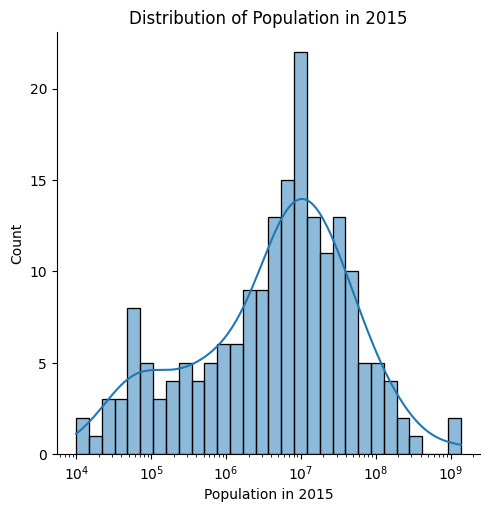

In [133]:
sns.displot(pop_2015["2015"], bins=30, kde=True,log_scale=True)
plt.xlabel("Population in 2015")
plt.title("Distribution of Population in 2015")
plt.show()

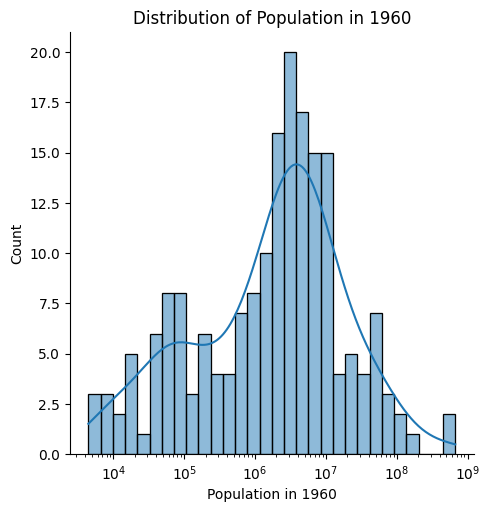

In [134]:
sns.displot(pop_1960["1960"], bins=30, kde=True,log_scale=True)
plt.xlabel("Population in 1960")
plt.title("Distribution of Population in 1960")
plt.show()

In [135]:
population_2015_continent = pop_2015.groupby("Continent").sum()

population_2015_continent

,Country Name,2015
Continent,,
Africa,NigeriaEthiopiaSouth AfricaTanzaniaKenyaSudanA...,1.002906e+09
America,United StatesBrazilMexicoColombiaArgentinaCana...,9.583307e+08
Asia,ChinaIndiaIndonesiaPakistanBangladeshJapanPhil...,4.081956e+09
Europe,Russian FederationGermanyFranceUnited KingdomI...,7.341438e+08
Oceania,AustraliaPapua New GuineaNew ZealandFijiSolomo...,3.907908e+07


## population par continent
# plt.bar(population_2015_continent.index, population_2015_continent["2015"])
# plt.xlabel("Continent")
# plt.ylabel("Population")
# plt.title("Population in 2015 by Continent")
# plt.show()

In [ ]:

# sns.displot(pop_2015["2015"], bins=30, kde=True,log_scale=True)
# plt.xlabel("Population in 2015")
# plt.title("Distribution of Population in 2015")
# plt.show()


##population par continent

# plt.bar(population_2015_continent.index, population_2015_continent["2015"])
# plt.xlabel("Continent")
# plt.ylabel("Population")
# plt.title("Population in 2015 by Continent")
# plt.show()



Okay how could be approximate such a distribution? Maybe we could try to see how the log of this distribution looks!

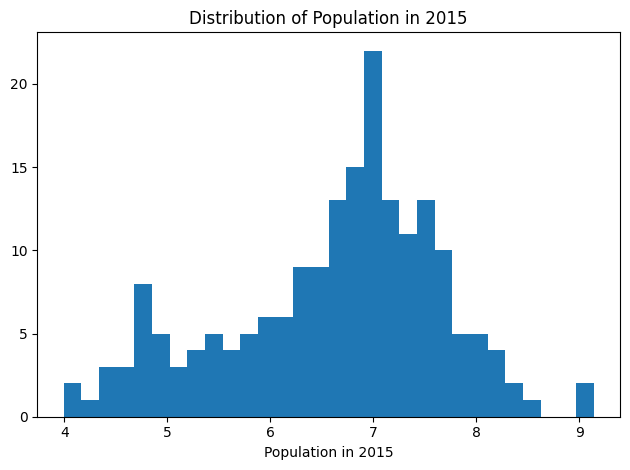

In [153]:
# TODO: plot the log of this distribution using numpy
# sns.displot(pop_2015["2015"], bins=30, kde=True,log_scale=True)


#(pop_2015["2015"], bins=30, kde=True,log_scale=True)


# plt.xlabel("Population in 2015")
# plt.title("Distribution of Population in 2015")
# plt.show()

fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

axs.hist(np.log10(pop_2015["2015"]), bins=30)
# If you want to plot the log of the distribution:
# axs.hist(np.log10(pop_2015["2015"]), bins=30)

plt.xlabel("Population in 2015")
plt.title("Distribution of Population in 2015")
plt.show()


Okay now we'll try to approximate that with a gaussian distribution by hands!

So now you have to compute the mean and standard deviation of this log population distribution. Then compute the gaussian over the range of populations using those mean and standard deviations. 
Finally plot it over the histogram and see how it fits.

Hint: you might need to make handmade adjustement for the amplitude of the gaussian.

In [169]:
# mu = np.mean(df)
# sigma = np.std(df)

mu = np.mean(pop_2015["2015"])
sigma = np.std(pop_2015["2015"])

print("mu : ",mu," et ",sigma)

mu :  36065691.67195767  et  142059880.94650197


In [170]:
# TODO: plot your own gaussian distribution on top of the log population distribution
# 

def compute_gauss (x, mu, sigma):
    return(np.exp((-0.5)*((x-mu)/sigma)**2))

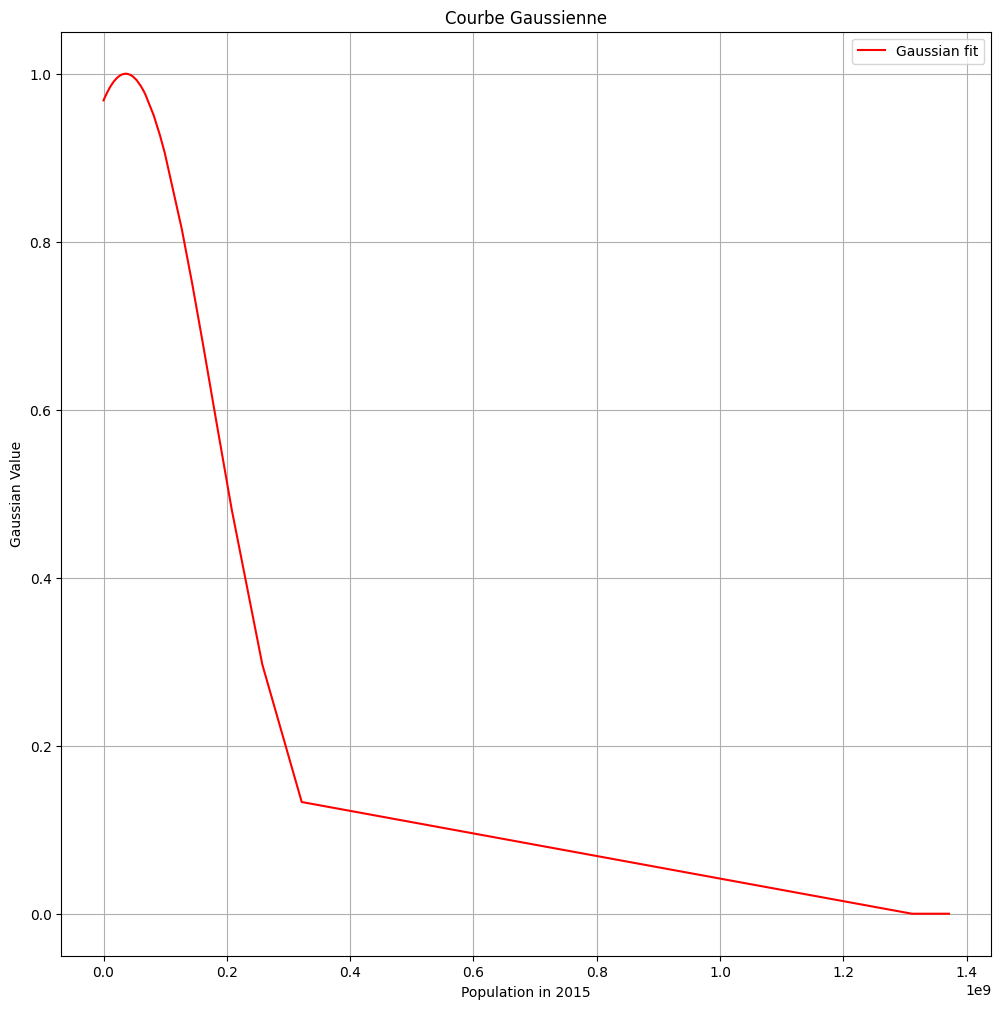

In [171]:
gauss_2015 = compute_gauss(pop_2015["2015"], mu, sigma)
x = pop_2015["2015"]
y = gauss_2015

plt.figure(figsize=(12, 12))
plt.plot(x, y, 'r-', label='Gaussian fit')
plt.title("Courbe Gaussienne")
plt.xlabel("Population in 2015")
plt.ylabel("Gaussian Value")
plt.grid(True)
plt.legend()
plt.show()

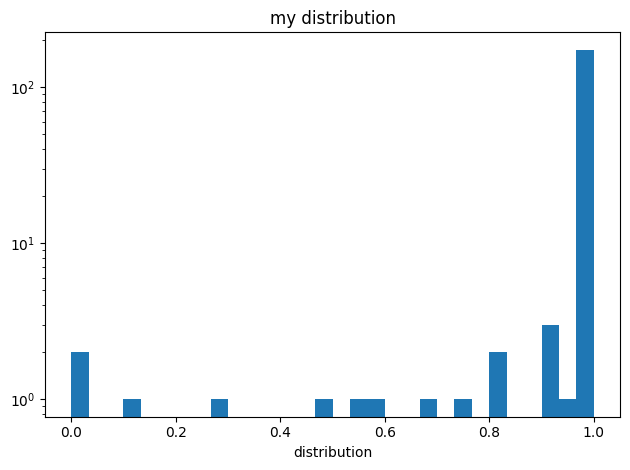

In [ ]:
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

# If you want to plot the log of the distribution:
# axs.hist(np.log10(pop_2015["2015"]), bins=30)
axs.hist(gauss_2015, bins=30, log=True)
plt.xlabel("distribution")
plt.title("my distribution")
plt.show()

Now let's try to understand better the data and the correlations!
Let's plot the population evolution of France vs US!

In [ ]:
# TODO: Plot the population evolution of France versus the one of United States

In [ ]:
# TODO: Compute and print the correlation of the population evolution of France and United States

Wow! Quite a correlation, right? What do you say, is there a causality?

Now let's do the same for Hungary versus China from 1980 to 2015.

In [ ]:
# TODO: Plot the population evolution of Hungary versus the one of China from 1980 to 2015

In [ ]:
# TODO: Compute and print the correlation of the population evolution of Hungary and China from 1980

So what is your interpretation of this result? Is there a causality?

Now feel free to find other correlations and to approximate other distributions by yourself!

In [174]:
pop_china = population[population["Country Name"] == "China"]
pop_india = population[population["Country Name"] == "India"]

In [ ]:
population_cleaned = pd.read_csv("../input/population_clean.csv")
population_hor = population_cleaned if isinstance(population_cleaned, pd.DataFrame) else pd.read_csv(io.StringIO(population_cleaned))
id_vars = ['Country Name', 'Continent']
Years = [str(year) for year in range(1960, 2016)]  # List of years as strings

Population_verticale = pd.melt(
    population_hor,
    id_vars=id_vars,
    value_vars=Years,
    var_name='Annee',
    value_name='Population'
)


In [181]:
Population_verticale.head()

,Country Name,Continent,Annee,Population
0,Aruba,America,1960,54208.0
1,Andorra,Europe,1960,13414.0
2,Afghanistan,Asia,1960,8994793.0
3,Angola,Africa,1960,5270844.0
4,Albania,Europe,1960,1608800.0


In [190]:
def evaluer_prediction(nom_pays, annee_coupure, df_complet):
    """
    Entraîne un modèle Prophet sur les données d'un pays jusqu'à une année donnée
    """
  
    df_pays = df_complet[df_complet['Country Name'] == nom_pays].copy()
    
    if df_pays.empty:
        print(f"Erreur : Le pays '{nom_pays}' n'a pas été trouvé.")
        return

In [193]:
nom_pays = 'France'

# Filter the vertical population dataframe for the selected country
df_pays = Population_verticale[Population_verticale['Country Name'] == nom_pays].copy()

df_prophet = df_pays.rename(columns={'Annee': 'ds', 'Population': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

In [194]:
annee_coupure = 2010  # Définir l'année de coupure souhaitée
train_data = df_prophet[df_prophet['ds'].dt.year <= annee_coupure]


In [195]:
model = Prophet()
model.fit(train_data)

15:46:13 - cmdstanpy - INFO - Chain [1] start processing
15:46:15 - cmdstanpy - INFO - Chain [1] done processing


In [197]:
# Define test_data as the data after the cutoff year
test_data = df_prophet[df_prophet['ds'].dt.year > annee_coupure]

future_dates = model.make_future_dataframe(periods=len(test_data), freq='AS')
forecast = model.predict(future_dates)


/Users/julien/.pyenv/versions/Artefact/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  dates = pd.date_range(


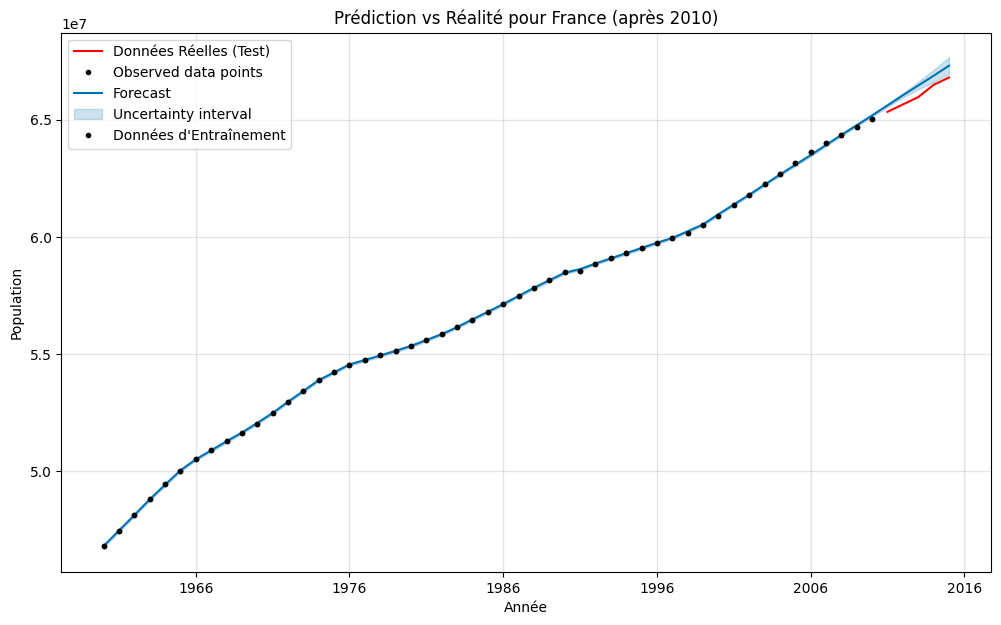

In [198]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(test_data['ds'], test_data['y'], 'r', label='Données Réelles (Test)')
model.plot(forecast, ax=ax)
ax.plot(train_data['ds'], train_data['y'], 'k.', label='Données d\'Entraînement')
ax.set_title(f'Prédiction vs Réalité pour {nom_pays} (après {annee_coupure})')
ax.set_xlabel('Année')
ax.set_ylabel('Population')
ax.legend()
plt.grid(True)
plt.show()


